# Lecture 19 - Symbolic Calculus with SymPy

## Overview, Objectives, and Key Terms
 
Symbolic computing using SymPy was introduced in [Lecture 18](ME400_Lecture_18.ipynb).  The basics of symbols, symbolic expressions, and solving symbolic equations were introduced.  In this lesson, additional features of SymPy related to calculus will be demonstrated.

### Objectives

By the end of this lesson, you should be able to

- Evaluate limits using SymPy
- Evaluate derivatives using SymPy
- Evaluate integrals using SymPy

### Key Terms

- `sympy.limit`
- `sympy.diff`
- `sympy.Derivative`
- `sympy.integrate`
- `sympy.Integral`

## In the Beginning There Were Limits

Classical definition for the derivative of a function $f(x)$ is 

$$
  \lim_{h \to 0} \frac{f(x+h)-f(x)}{h} \, .
$$


**3-minute Exercise**: Determine $df/dx$ for $f(x) = ax^2 + bx + c$ using this definition.

SymPy can handle limits:

In [1]:
import sympy as sp
sp.init_printing()
a, b, c, x, h = sp.symbols('a b c x h')

In [2]:
f = a*x**2 + b*x + c
f_plus = f.subs({x:x+h})

In [3]:
sp.limit((f_plus-f)/h, h, 0)

Limits don't need to be evaluated:

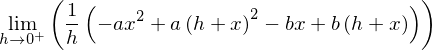

In [4]:
sp.Limit((f_plus-f)/h, h, 0)

In [5]:
sp.Limit((f_plus-f)/h, h, 0).doit()

**Exercise**:  Is $\lim_{h \to 0} \frac{f(x)-f(x-h)}{h}$ just as good for $df/dx$?  

## Derivatives

In [6]:
sp.diff(f, x)

In [7]:
sp.diff(f, x, 2)

In [8]:
sp.diff(f, x, 3)

Symbolic "functions" can also be differentiated:

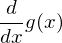

In [9]:
g = sp.Symbol('g')
sp.diff(g(x), x)

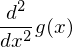

In [10]:
sp.diff(g(x), x, 2)

Derivatives can be defined and not evaluated:

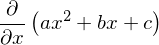

In [11]:
sp.Derivative(f, x)

That's a *partial derivative*, e.g.,:
$$
 \frac{\partial f}{\partial x} = \lim_{h\to 0} \frac{ f(x+h,y)-f(x, y) }{h}
$$

## And Then There Were More Limits

For *definite* integrals, you may remember the following formal definition:

$$
  \int^b_a f(x) dx = 
     \lim_{n \to \infty} \sum^{n}_{i=1} f(i (b-a)/n + a) (b-a)/n
$$

The right-hand side is called a *Riemann sum*.

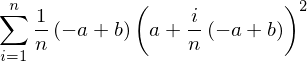

In [12]:
x, i, n, a, b, = sp.symbols('x i n a b')
f = x**2
sp.Sum(((b-a)/n) * f.subs({x:i*(b-a)/n+a}), (i, 1, n))

**Example** Evaluate $\int^b_a f(x) dx$ for $f(x) = x^2$, $a=0$, and $b=1$ using the formal limit.

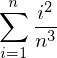

In [13]:
S = sp.Sum(((b-a)/n) * f.subs({x:i*(b-a)/n+a}), (i, 1, n)).subs({a:0, b:1})  
S

In [14]:
for m in [10, 100, 1000, 10000, 100000]:
    print(S.subs({n:m}).evalf())

0.385000000000000
0.338350000000000
0.333833500000000
0.333383335000000
0.333338333350000


Can the limit be taken formally?

In [15]:
S.subs({n:sp.oo}).evalf() 

In [16]:
sp.limit(S, n, sp.oo)

## Symbolic Integration

Improper:

In [17]:
f = x**2
sp.integrate(f, x)

Definite:

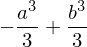

In [18]:
sp.integrate(f, (x, a, b))

Define with evaluation (like for limits and derivatives):

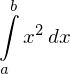

In [19]:
I = sp.Integral(f, (x, a, b))
I

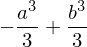

In [20]:
I.doit()

Multiple integrals:

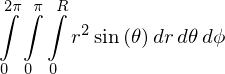

In [21]:
r, R, phi, theta = sp.symbols('r R phi theta')
V = sp.Integral(r**2*sp.sin(theta), (r, 0, R), (theta, 0, sp.pi), (phi, 0, 2*sp.pi))
V

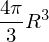

In [22]:
V.doit()

## Recap

By now, you should be able to

- Evaluate limits using SymPy
- Evaluate derivatives using SymPy
- Evaluate integrals using SymPy